In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Current Date for graphs
date = datetime.today()
date

datetime.datetime(2019, 1, 19, 19, 31, 7, 28807)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) #previously 1500
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

618

In [9]:
#Set size of Group for api throttling
num = 55

df_data = pd.DataFrame({'City':cities,'Country':countries}).reset_index()
df_data["index+"] = df_data["index"]+1 
df_data["record"] = df_data["index"].mod(num)+1
df_data["set"] = np.ceil(df_data["index+"]/num)
df_data.head()

,index,City,Country,index+,record,set
0,0,kruisfontein,za,1,1,1.0
1,1,rio verde de mato grosso,br,2,2,1.0
2,2,hasaki,jp,3,3,1.0
3,3,punta arenas,cl,4,4,1.0
4,4,pangnirtung,ca,5,5,1.0


In [10]:
#Get total number of sets for API calls
maxSet = df_data['set'].max()
maxSet

12.0

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name

In [11]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

columns = ['City','Country','Cloudiness','Dt','Humidity','Lat','Long','Max Temp','Wind Speed']
df_weather = pd.DataFrame(columns=columns)


print('Beginning Data Retreival\n----------------')
for i in np.arange(1,maxSet+1):
    start = time.time()
    df_set = df_data.loc[df_data['set'] == i]
    for index,row in df_set.iterrows():
        print(f'Processing Record {index} of set {i}| {row["City"]}')
        city = row["City"]
        country = row["Country"]
        cityParam = f'{city},{country}'
        params = {'q':cityParam,
                  'units':'imperial',
             'APPID' :api_keys.api_key}
        try:
            data = requests.get(url,params).json()
            weather = {"City":[city],
                        "Country": [country],
                        "Cloudiness":[data['clouds']['all']],
                        "Dt": data['dt'],
                        "Humidity":[data['main']['humidity']],
                        "Lat":[data['coord']['lat']],
                        "Long":[data['coord']['lon']],
                        "Max Temp":[data['main']['temp_max']],
                        "Wind Speed":[data['wind']['speed']],
                      }
            #print(pd.DataFrame.from_dict(weather))
            df_weather = df_weather.append(pd.DataFrame.from_dict(weather),sort=True)
            
        except KeyError:
            print(f'------{row["City"]} not found in Open Weathermaps ------')
            #df_data['found'].iloc[index] =0
    end = time.time()
    print(f"**Time Elapsed:{'%.2f' %(end-start)}(s)")
    
    if i < maxSet: #only sleep if not max set in dataframe
        print(f"**Sleep:{'%.2f' %(61-(end-start))}(s)")
        time.sleep(61-(end-start))
print('\n----------------\nData Retrevial Complete\n----------------')
df_weather.head()

Beginning Data Retreival
----------------
Processing Record 0 of set 1.0| kruisfontein
Processing Record 1 of set 1.0| rio verde de mato grosso
Processing Record 2 of set 1.0| hasaki
Processing Record 3 of set 1.0| punta arenas
Processing Record 4 of set 1.0| pangnirtung
Processing Record 5 of set 1.0| katherine
Processing Record 6 of set 1.0| plettenberg bay
Processing Record 7 of set 1.0| thompson
Processing Record 8 of set 1.0| hohhot
Processing Record 9 of set 1.0| kuytun
------kuytun not found in Open Weathermaps ------
Processing Record 10 of set 1.0| albany
Processing Record 11 of set 1.0| belushya guba
------belushya guba not found in Open Weathermaps ------
Processing Record 12 of set 1.0| cururupu
Processing Record 13 of set 1.0| busselton
Processing Record 14 of set 1.0| rikitea
Processing Record 15 of set 1.0| grand river south east
------grand river south east not found in Open Weathermaps ------
Processing Record 16 of set 1.0| havre-saint-pierre
Processing Record 17 of s

------tumannyy not found in Open Weathermaps ------
Processing Record 162 of set 3.0| gunjur
Processing Record 163 of set 3.0| longyearbyen
Processing Record 164 of set 3.0| ulladulla
**Time Elapsed:14.89(s)
**Sleep:46.11(s)
Processing Record 165 of set 4.0| kaitangata
Processing Record 166 of set 4.0| tianpeng
Processing Record 167 of set 4.0| clyde river
Processing Record 168 of set 4.0| padang
Processing Record 169 of set 4.0| bathsheba
Processing Record 170 of set 4.0| geraldton
Processing Record 171 of set 4.0| pemangkat
------pemangkat not found in Open Weathermaps ------
Processing Record 172 of set 4.0| kahului
Processing Record 173 of set 4.0| samusu
------samusu not found in Open Weathermaps ------
Processing Record 174 of set 4.0| narsaq
Processing Record 175 of set 4.0| miandrivazo
Processing Record 176 of set 4.0| meulaboh
Processing Record 177 of set 4.0| crab hill
------crab hill not found in Open Weathermaps ------
Processing Record 178 of set 4.0| kalynivka
Processing 

Processing Record 324 of set 6.0| pandan
Processing Record 325 of set 6.0| cervo
Processing Record 326 of set 6.0| methoni
Processing Record 327 of set 6.0| palembang
Processing Record 328 of set 6.0| yerbogachen
Processing Record 329 of set 6.0| adrar
**Time Elapsed:12.06(s)
**Sleep:48.94(s)
Processing Record 330 of set 7.0| ahumada
------ahumada not found in Open Weathermaps ------
Processing Record 331 of set 7.0| doha
------doha not found in Open Weathermaps ------
Processing Record 332 of set 7.0| bellevue
Processing Record 333 of set 7.0| hovd
Processing Record 334 of set 7.0| obluche
------obluche not found in Open Weathermaps ------
Processing Record 335 of set 7.0| lima
Processing Record 336 of set 7.0| isangel
Processing Record 337 of set 7.0| port blair
Processing Record 338 of set 7.0| chifeng
Processing Record 339 of set 7.0| sao sebastiao
Processing Record 340 of set 7.0| saldanha
Processing Record 341 of set 7.0| tigzirt
Processing Record 342 of set 7.0| husavik
Processi

Processing Record 486 of set 9.0| pontes e lacerda
Processing Record 487 of set 9.0| alta floresta
Processing Record 488 of set 9.0| laguna de duero
Processing Record 489 of set 9.0| luanda
Processing Record 490 of set 9.0| mount gambier
Processing Record 491 of set 9.0| naberera
Processing Record 492 of set 9.0| kushmurun
------kushmurun not found in Open Weathermaps ------
Processing Record 493 of set 9.0| emba
------emba not found in Open Weathermaps ------
Processing Record 494 of set 9.0| leeton
**Time Elapsed:11.91(s)
**Sleep:49.09(s)
Processing Record 495 of set 10.0| ijaki
------ijaki not found in Open Weathermaps ------
Processing Record 496 of set 10.0| hoquiam
Processing Record 497 of set 10.0| bahia blanca
Processing Record 498 of set 10.0| yomitan
------yomitan not found in Open Weathermaps ------
Processing Record 499 of set 10.0| poronaysk
Processing Record 500 of set 10.0| alghero
Processing Record 501 of set 10.0| blagoyevo
Processing Record 502 of set 10.0| tolyatti
P

,City,Cloudiness,Country,Dt,Humidity,Lat,Long,Max Temp,Wind Speed
0,kruisfontein,0,za,1547947957,91,-34,24.73,58.68,7.63
0,rio verde de mato grosso,88,br,1547947958,92,-18.92,-54.84,71.69,3.71
0,hasaki,20,jp,1547946000,48,35.73,140.83,44.60,3.36
0,punta arenas,40,cl,1547946000,43,-53.16,-70.91,51.80,31.09
0,pangnirtung,12,ca,1547947958,59,66.15,-65.72,-33.53,3.38


In [12]:
df_weather.to_csv("city_weather.csv")
df_weather.count()

City          537
Cloudiness    537
Country       537
Dt            537
Humidity      537
Lat           537
Long          537
Max Temp      537
Wind Speed    537
dtype: int64

In [13]:
Lat=df_weather["Lat"]
Temp=df_weather["Max Temp"]
Humid=df_weather["Humidity"]
Cloud=df_weather["Cloudiness"]
Wind=df_weather["Wind Speed"]

Latitude vs. Temperature Plot

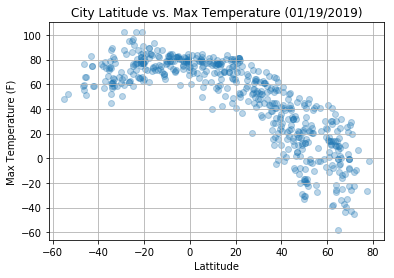

In [14]:
plt.scatter(Lat,Temp,alpha=0.3)
plt.title(f"City Latitude vs. Max Temperature ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("Lattitude vs Teperature.png")
plt.show()

Latitude vs. Humidity Plot


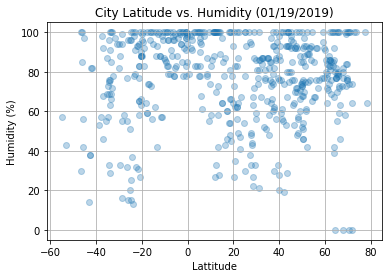

In [15]:
plt.scatter(Lat,Humid,alpha=0.3)
plt.title(f"City Latitude vs. Humidity ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("Lattitude vs Humidity.png")
plt.show()

Latitude vs. Cloudiness Plot


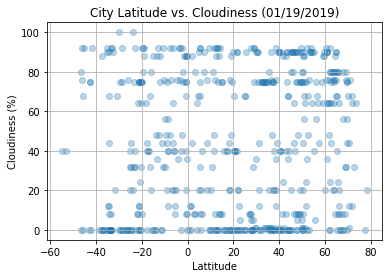

In [16]:
plt.scatter(Lat,Cloud,alpha=0.3)
plt.title(f"City Latitude vs. Cloudiness ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Lattitude vs Cloudiness.png")
plt.show()

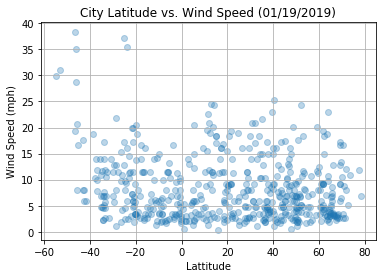

In [17]:
plt.scatter(Lat,Wind,alpha=0.3)
plt.title(f"City Latitude vs. Wind Speed ({date.strftime('%m/%d/%Y')})")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Lattitude vs Wind Speed.png")
plt.show()

Conclusion

From our findings, we can obsevre a clear relationship between latitude and temperature. As we move closer to the equator, the temperature goes up. We can also see that the temperature between about (-20) and (20) degrees does not vary much.  What we're seeing is the range between the Tropic of Cancer and Tropic of Capricorn, the furthest two latitudes from the equator where the sun reaches zenith (directly overhead) at least once a year. 